**Problem 1**

For this 'capture-release-recapture' problem, we would like to point out a very interesting feature in the graphs of probability versus fish population plotted above: they all show a maxima in probability at a point given by $n = \lceil m^2/p \rceil$. This claim of ours can be backed up theoretically by the following argument:
Once we catch and mark m fish, the fraction of fish population that have been marked in the lake will be m/n. Now, next time when we catch m fish at another random location, we would expect that in the captured set of fish, the fraction of the marked fish will still remain the same. Obviously, this need not be true always but this situation represents the case of maximum probability of recapturing the previously marked fishes. So, our 'best guess' for n is given by m/n = p/m, which yields $n = m^2/p$.

The number of fishes that maximize the probability of the experiment are: 999


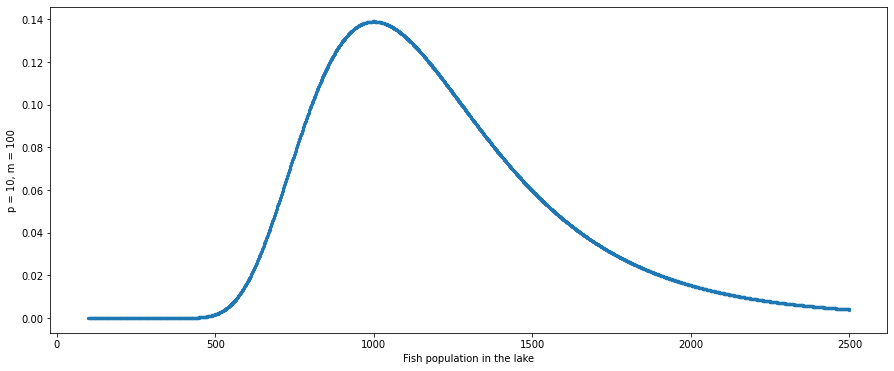

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
plt.rcParams['figure.figsize']= [15,6]

N = 2500  # maximum estimate of n
m = 100   # number of fishes caught each time for sampling
p = [10, 20, 50, 75]

def nCr(n, r):
  return (fact(n) / (fact(r)* fact(n - r)))

def fact(n):
  if n == 0:
    return 1
  res = 1

  for i in range(2, n+1):
    res = res * i

  return res

n = []
for i in range(m,N+1):
 n.append(i)

Prob = []
for i in range(0, N-m+1):
  Prob.append((nCr(m,p[0]) * nCr(n[i]-m,m-p[0])) / nCr(n[i],m))

plt.scatter(n, Prob, s=5)
plt.xlabel('Fish population in the lake')
plt.ylabel('p = ' + str(p[0]) + ', m = ' + str(m))

Prob_max = max(Prob)
print('The number of fishes that maximize the probability of the experiment are: ' + str(Prob.index(Prob_max)+m))

The number of fishes that maximize the probability of the experiment are: 499


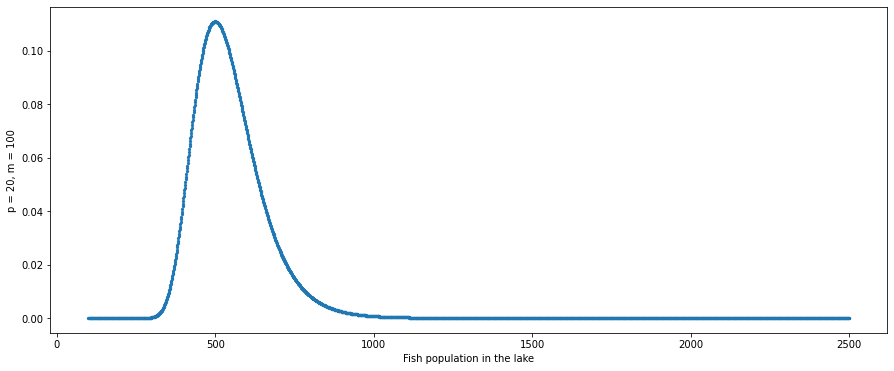

In [2]:
Prob = []
for i in range(0, N-m+1):
  Prob.append((nCr(m,p[1]) * nCr(n[i]-m,m-p[1])) / nCr(n[i],m))

plt.scatter(n, Prob, s=5)
plt.xlabel('Fish population in the lake')
plt.ylabel('p = ' + str(p[1]) + ', m = ' + str(m))

Prob_max = max(Prob)
print('The number of fishes that maximize the probability of the experiment are: ' + str(Prob.index(Prob_max)+m))

The number of fishes that maximize the probability of the experiment are: 199


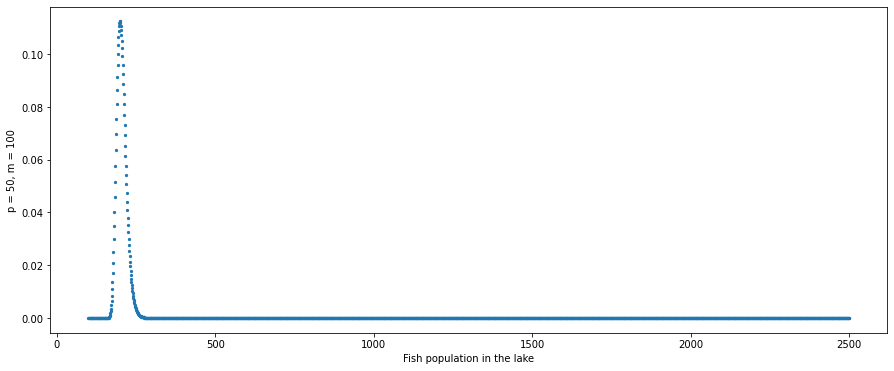

In [4]:
Prob = []
for i in range(0, N-m+1):
  Prob.append((nCr(m,p[2]) * nCr(n[i]-m,m-p[2])) / nCr(n[i],m))

plt.scatter(n, Prob, s=5)
plt.xlabel('Fish population in the lake')
plt.ylabel('p = ' + str(p[2]) + ', m = ' + str(m))

Prob_max = max(Prob)
print('The number of fishes that maximize the probability of the experiment are: ' + str(Prob.index(Prob_max)+m))

The number of fishes that maximize the probability of the experiment are: 133


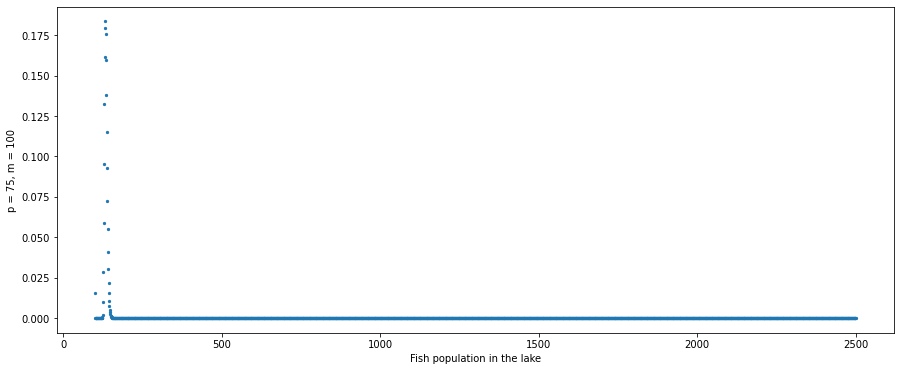

In [3]:
Prob = []
for i in range(0, N-m+1):
  Prob.append((nCr(m,p[3]) * nCr(n[i]-m,m-p[3])) / nCr(n[i],m))

plt.scatter(n, Prob, s=5)
plt.xlabel('Fish population in the lake')
plt.ylabel('p = ' + str(p[3]) + ', m = ' + str(m))

Prob_max = max(Prob)
print('The number of fishes that maximize the probability of the experiment are: ' + str(Prob.index(Prob_max)+m))

**Problem 2**

The sample mean of the errors is: 945.0588744588727
The sample variance of the errors is: 1825399.6552920754


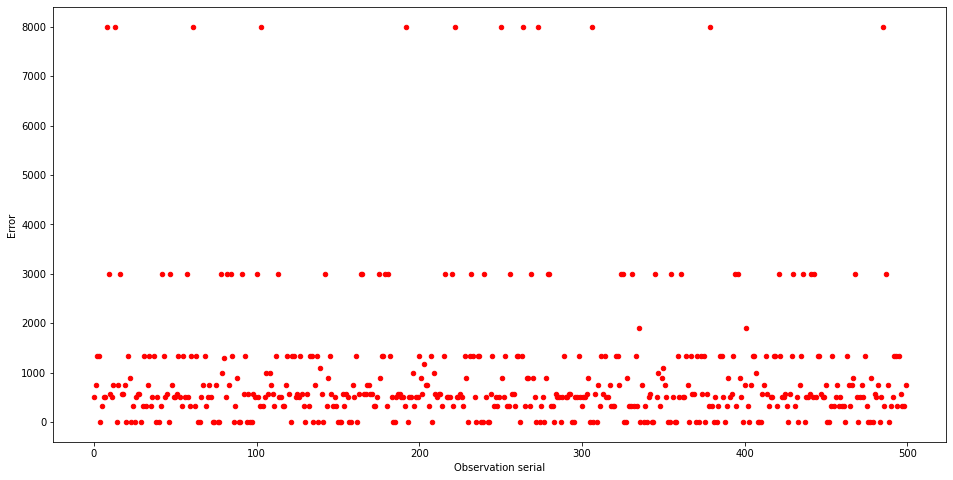

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

N = 500        # number of iterations
n_o = 2000     # actual(estimated?) number of fish in the lake
error = []     # list for storing errors
x = []
p_vals = []

for j in range (0, N):
  n = 2000      # total number of locations
  m = 100       # number of randomly chosen locations
  p = 0         # number of marked fish that were caught yet again

  locations = [0] * n
  index_list = []
  random_catches = []; random_re_catches = []
  common_catches = []

  for i in range(0, n):
     index_list.append(i)

  random_catches = random.sample(index_list,m)

  for i in range(0, len(random_catches)):
     locations[random_catches[i]] = 1

  random_re_catches = random.sample(index_list,m)

  for element in random_catches:
      if element in random_re_catches:
          common_catches.append(element)

  p = len(common_catches)
  if p != 0 :
    p_vals.append(p)
  else:
    p_vals.append(100)
 
for j in range(0, N):
  error.append(abs((m*m/p_vals[j])-n_o))
  x.append(j)

plt.figure(figsize=(16,8))
plt.scatter(x, error, s=20, c='red')
plt.xlabel('Observation serial')
plt.ylabel('Error')

sample_mean = sum(error)/N
sample_variance = 0

for j in range(0,N):
  sample_variance += (error[j]-sample_mean)**2

sample_variance = sample_variance/N

print('The sample mean of the errors is: ' + str(sample_mean))
print('The sample variance of the errors is: ' + str(sample_variance))

**Problem 3**

As per given data, at each step a new packet can be added to the queue with probability 0.3 and a packet from the buffer memory is removed with a probability of 0.4 . Now, this event is independent of the fact as to when the last packet arrived (This is due to the fact that the situation is that of a geometric R.V., where irrespective of when the previous packet arrived/left, at each point in time, probability with which a new packet arrives and previous packet from memory leaves remain the same). Using this, one can simulate the process a million times and at each unit time interval, we can calculate the number of packets in buffer memory, store this value in an array and then plot these on the graph.

Text(0, 0.5, 'P(n) = Fraction of time there are n packets in buffer memory')

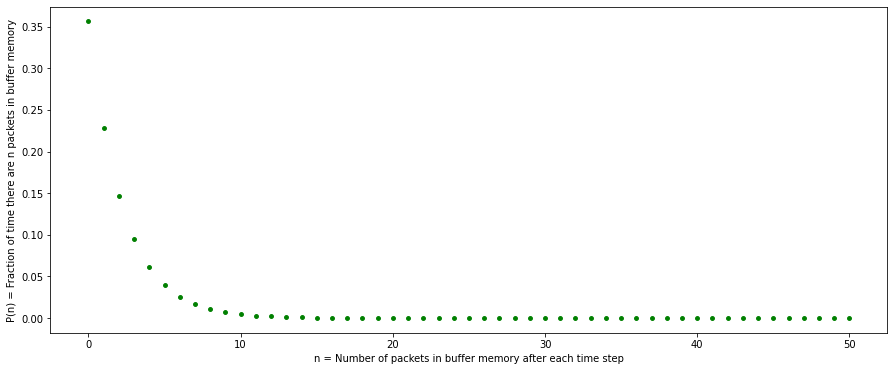

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

num = 0         # number of data packets 
N = 1000000     # number of time steps
n = 50          # x-axis limits

p = 0.30        # probability of arrival of data packet at a given time step
q = 0.40        # probability of transmission of data packet at a given time step

arr = np.zeros(n+1)
x = np.arange(0,n+1)

time = []
for i in range (0, N+1):
  time.append(i)

for i in range(0, N+1):

   if random.random() <= p:
      num += 1

   if random.random() <= q:
    if num > 0:
       num -= 1
   if num <= 100:
      arr[num] += 1

plt.figure(figsize=(15,6))
plt.scatter(x, arr/N, s=15, c='green')
plt.xlabel('n = Number of packets in buffer memory after each time step')
plt.ylabel('P(n) = Fraction of time there are n packets in buffer memory')

**Problem 4** 

In this particular problem, we extend our program to simulate some 10,000 queues and at the end of each queue, we note down the number of signals left in the buffer memory. The code for executing the same and the corresponding graph are as follows.

Text(0, 0.5, 'P(n) = fraction of time there were n packets in memory')

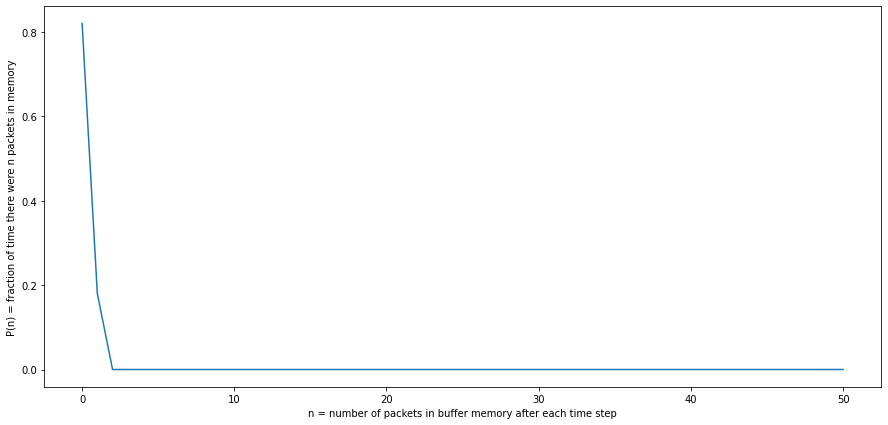

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

num = 0         # number of data packets 
N = 1000000     # number of time steps
M = 10000       # number of iterations
n = 50          # x-axis limits

p = 0.30        # probability of arrival of data packet at a given time step
q = 0.40        # probability of transmission of data packet at a given time step

arr = np.zeros(n+1)
x = np.arange(0,n+1)

time = []
for i in range (0, N+1):
  time.append(i)

for j in range(0, M):
  for i in range(0, N+1):

     if random.random() <= p:
        num += 1

     if random.random() <= q:
      if num > 0:
         num -= 1
     if num <= 100:
        arr[num] += 1

plt.figure(figsize=(15,6))
plt.scatter(x, arr/M, s=15, c='red')
plt.xlabel('n = Number of packets in buffer memory after each time step')
plt.ylabel('P(n) = Fraction of time there are n packets in buffer memory')